#### The aim of this project is to classify the celestial body based on the features given as Star, Galaxy or a Quasar. Its a classsification problem.

Steps followed in the project:

1) Importing the packages/libraries

2) Reading the dataset

3) Checking the shape

4) Checking the info

5) Data cleaning( Treating the missing values, dropping unwanted columns/rows)

6) Exploratory data analysis

7) Label encoding/One hot encoding

8) Outlier treatment

9) Defining X and y(independent and dependent variable)

10) Splitting the data into train and test

11) Fitting different models using GridhSearchCV

12) Checking the metrics for model evaluation

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [102]:
df=pd.read_csv("Space_server.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.240000e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.720000e+18,STAR,-0.000009,3306,54922,491
1,1.240000e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.640000e+17,STAR,-0.000055,323,51615,541
2,1.240000e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.230000e+17,GALAXY,0.123111,287,52023,513
3,1.240000e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.720000e+18,STAR,-0.000111,3306,54922,510
4,1.240000e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.720000e+18,STAR,0.000590,3306,54922,512


In [103]:
df.shape

(10000, 18)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Since there is only one value in the whole column, objid column can be dropped.

In [105]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [106]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.240000e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.644890e+18,0.143726,1460.986400,52943.533300,353.069400
std,2.122346e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013758e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.240000e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,3.000000e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.240000e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.390000e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.240000e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.970000e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.240000e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.880000e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.240000e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.470000e+18,5.353854,8410.000000,57481.000000,1000.000000


Since 'objid' is having same mean,median, max,min it can be observed that 'objid' is having only one value all through the column. Same holds with 'rerun' column. After checking the number of unique values for each columns, we can decide whether to delete these columns as they will have no impact on the output variable.

In [107]:
df['objid'].nunique()

1

In [108]:
df['rerun'].nunique()

1

In [109]:
#Dropping 'objid' and 'rerun' columns
df.drop(['objid','rerun'],inplace=True,axis=1)
df.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [110]:
a=df.select_dtypes(include='float')

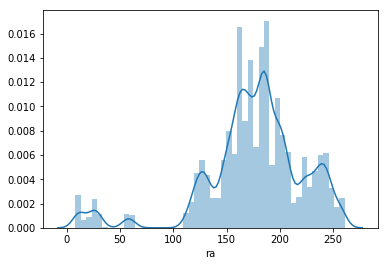

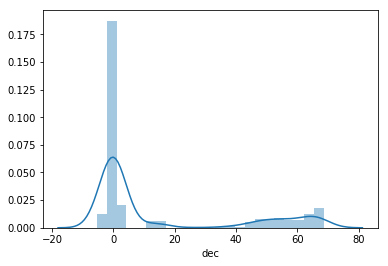

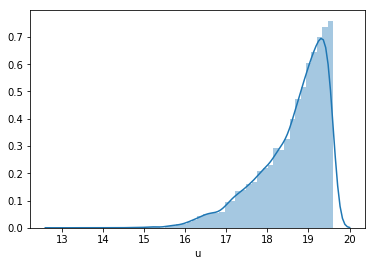

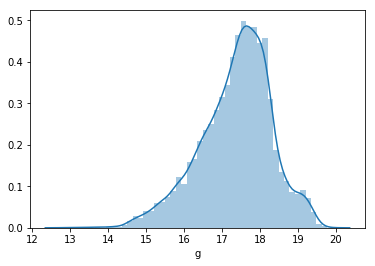

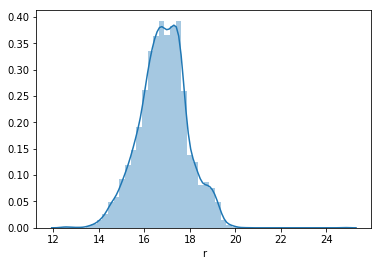

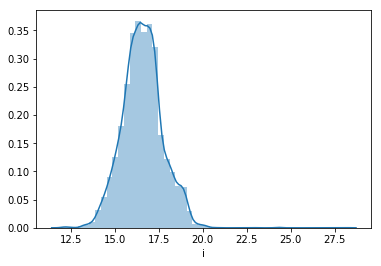

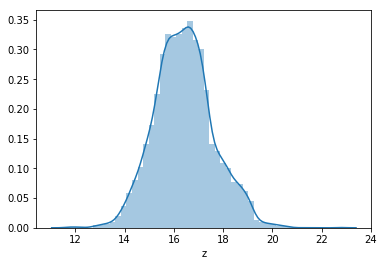

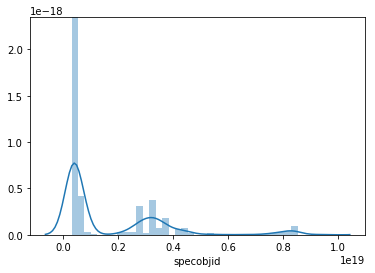

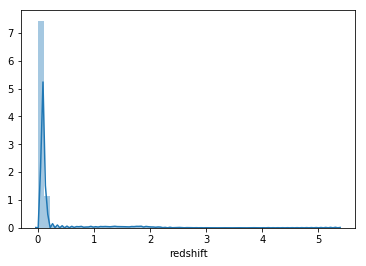

In [111]:
for i,x in enumerate(a):
    plt.figure(i)
    sns.distplot(a[x])


In [112]:
a.skew()

ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
specobjid    1.794503
redshift     4.265729
dtype: float64

In [113]:
df['specobjid']=np.log1p(df['specobjid'])

In [114]:
df['specobjid'].value_counts()

42.504322    443
42.628259    288
43.573572    202
42.760255    178
40.278569    156
42.615913    150
40.284980    131
42.436073    129
40.319520    128
40.275349    127
42.458133    123
40.281780    119
40.504923    116
40.554934    111
42.612803    106
42.738515    104
40.494614    103
40.272118    101
40.288169    101
42.634375    100
40.291349     93
40.316429     88
40.259088     82
40.755382     80
40.502356     79
40.510038     79
40.444138     77
40.262361     76
40.747366     74
40.249203     73
            ... 
41.052007      2
43.075772      2
40.824774      2
43.572380      2
40.832196      2
43.106663      2
40.473671      2
41.476090      2
43.525973      2
40.879136      1
43.523470      1
43.524722      1
43.470725      1
40.729092      1
43.123628      1
42.350750      1
40.522713      1
43.347146      1
40.942351      1
43.587774      1
43.408034      1
42.891095      1
43.694661      1
41.708896      1
40.811653      1
43.680838      1
41.335600      1
40.809765     

In [115]:
df.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,41.291583,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,1.099049,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,40.242559,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,40.364777,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,40.747366,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,42.504322,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,43.694661,5.353854,8410.000000,57481.000000,1000.000000


In [116]:
df.select_dtypes(include='float').columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'specobjid', 'redshift'], dtype='object')

In [117]:
df.select_dtypes(include='object').columns

Index(['class'], dtype='object')

In [118]:
df.select_dtypes(include='int64').columns

Index(['run', 'camcol', 'field', 'plate', 'mjd', 'fiberid'], dtype='object')

### EDA

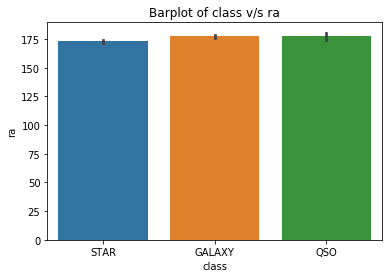

In [119]:
sns.barplot(df['class'],df['ra'])
plt.title("Barplot of class v/s ra")
plt.show()

From the above barplot, it can be seen that class galaxy and Quasar have slighly more 'ra' as compared to Star

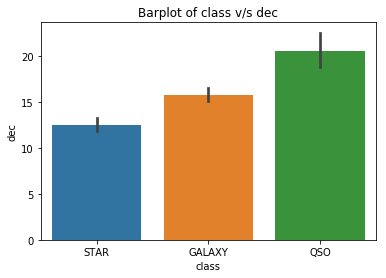

In [120]:
sns.barplot(df['class'],df['dec'])
plt.title("Barplot of class v/s dec")
plt.show()

From the above barplot, it can be seen that Quasar have the highest 'dec'

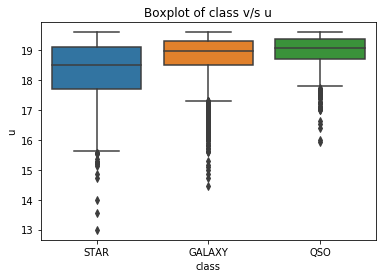

In [121]:
sns.boxplot(df['class'],df['u'])
plt.title("Boxplot of class v/s u")
plt.show()

From the above boxplot it can be seen that, class 'Star' has the lowest 'u'.

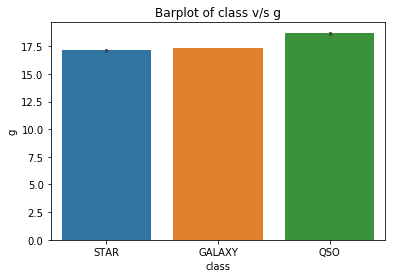

In [122]:
sns.barplot(df['class'],df['g'])
plt.title("Barplot of class v/s g")
plt.show()

From the above barplot, it can be seen that Quasar have the highest 'g'

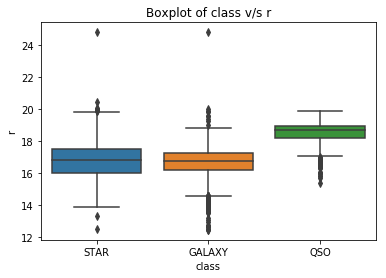

In [123]:
sns.boxplot(df['class'],df['r'])
plt.title("Boxplot of class v/s r")
plt.show()

From the above boxplot, it can be seen that Quasar have the highest 'r' as well.

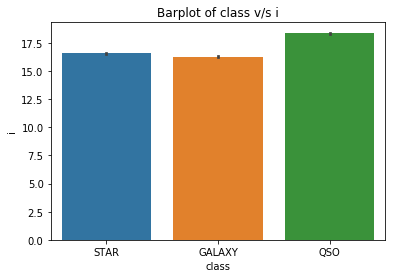

In [124]:
sns.barplot(df['class'],df['i'])
plt.title("Barplot of class v/s i")
plt.show()

From the above barplot, it can be seen that class 'Galaxy' has lower 'i' as compared to class 'star' and'quasar'

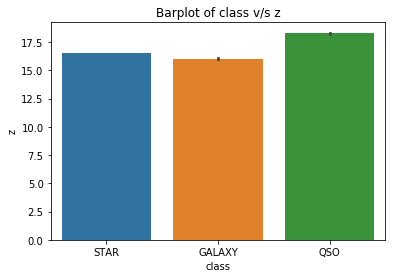

In [125]:
sns.barplot(df['class'],df['z'])
plt.title("Barplot of class v/s z")
plt.show()


From the above barplot, it can be seen that Quasar have the highest 'z' as well.

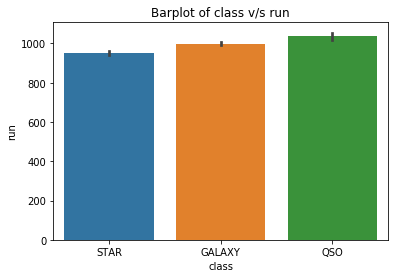

In [126]:
sns.barplot(df['class'],df['run'])
plt.title("Barplot of class v/s run")
plt.show()

From the above barplot, it can be seen that Quasar have the highest 'run' followed by class 'Galaxy' then byclass ' Star'

In [127]:
df['camcol'].value_counts()

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64

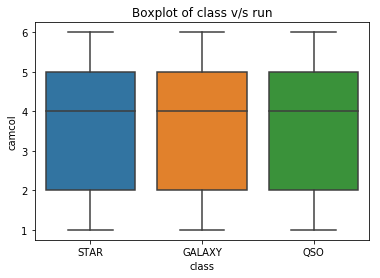

In [128]:
sns.boxplot(df['class'],df['camcol'])
plt.title("Boxplot of class v/s run")
plt.show()

From the above boxplot it can be seen that mean value of 'camcol' is almost same for all categories of classes.

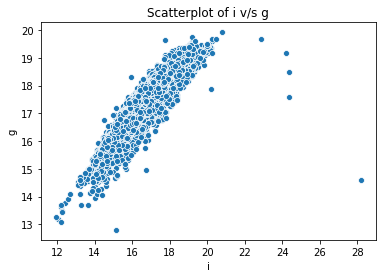

In [129]:
sns.scatterplot(df['i'],df['g'])
plt.title("Scatterplot of i v/s g")
plt.show()

From the above scattr plot it can be observed that 'i' and 'g' are very positively correlated.

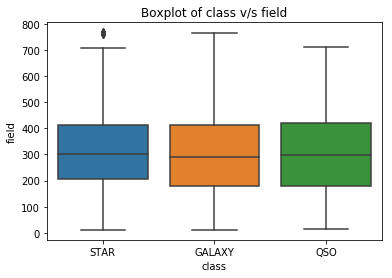

In [130]:
sns.boxplot(df['class'],df['field'])
plt.title("Boxplot of class v/s field")
plt.show()

From the above boxplot it can be seen that mean value of 'field' is slightly lesser in class 'Galaxy' as compared to other two classes

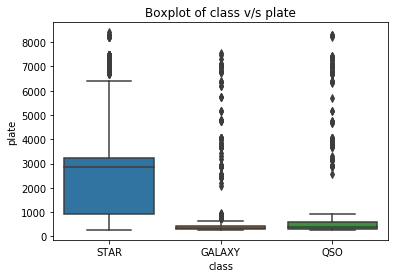

In [131]:
sns.boxplot(df['class'],df['plate'])
plt.title("Boxplot of class v/s plate")
plt.show()

From the above boxplot it can be seen that mean value of class 'Star' for 'plate' is very high than other two classes.

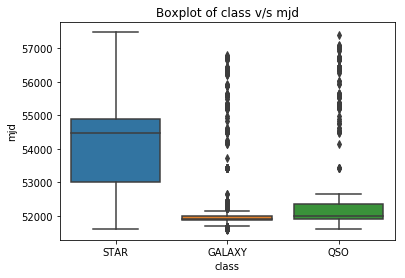

In [132]:
sns.boxplot(df['class'],df['mjd'])
plt.title("Boxplot of class v/s mjd")
plt.show()

From the above boxplot it can be seen that mean value of class 'Star' for 'mjd' is very high than other two classes.

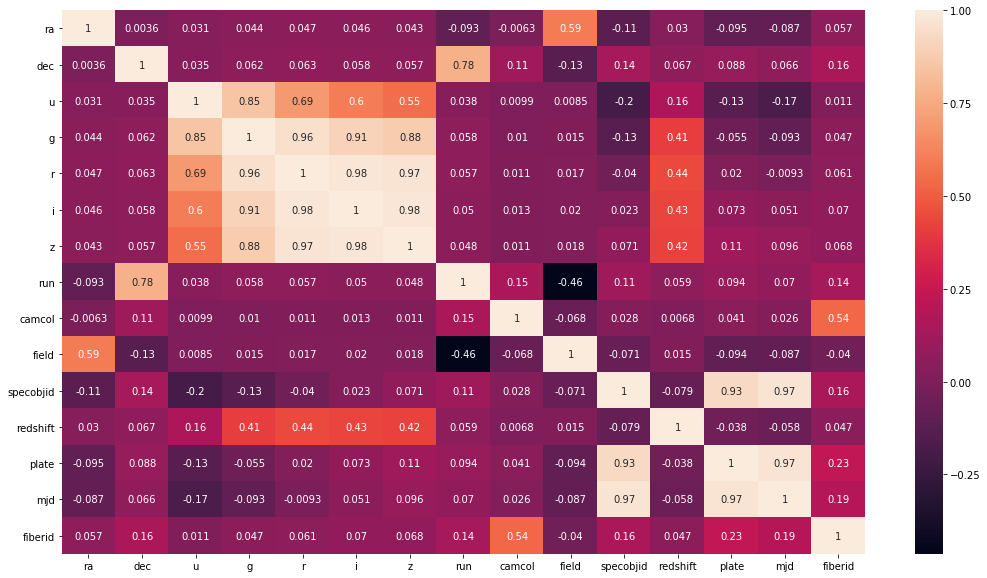

In [133]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Figure size 1440x1440 with 0 Axes>

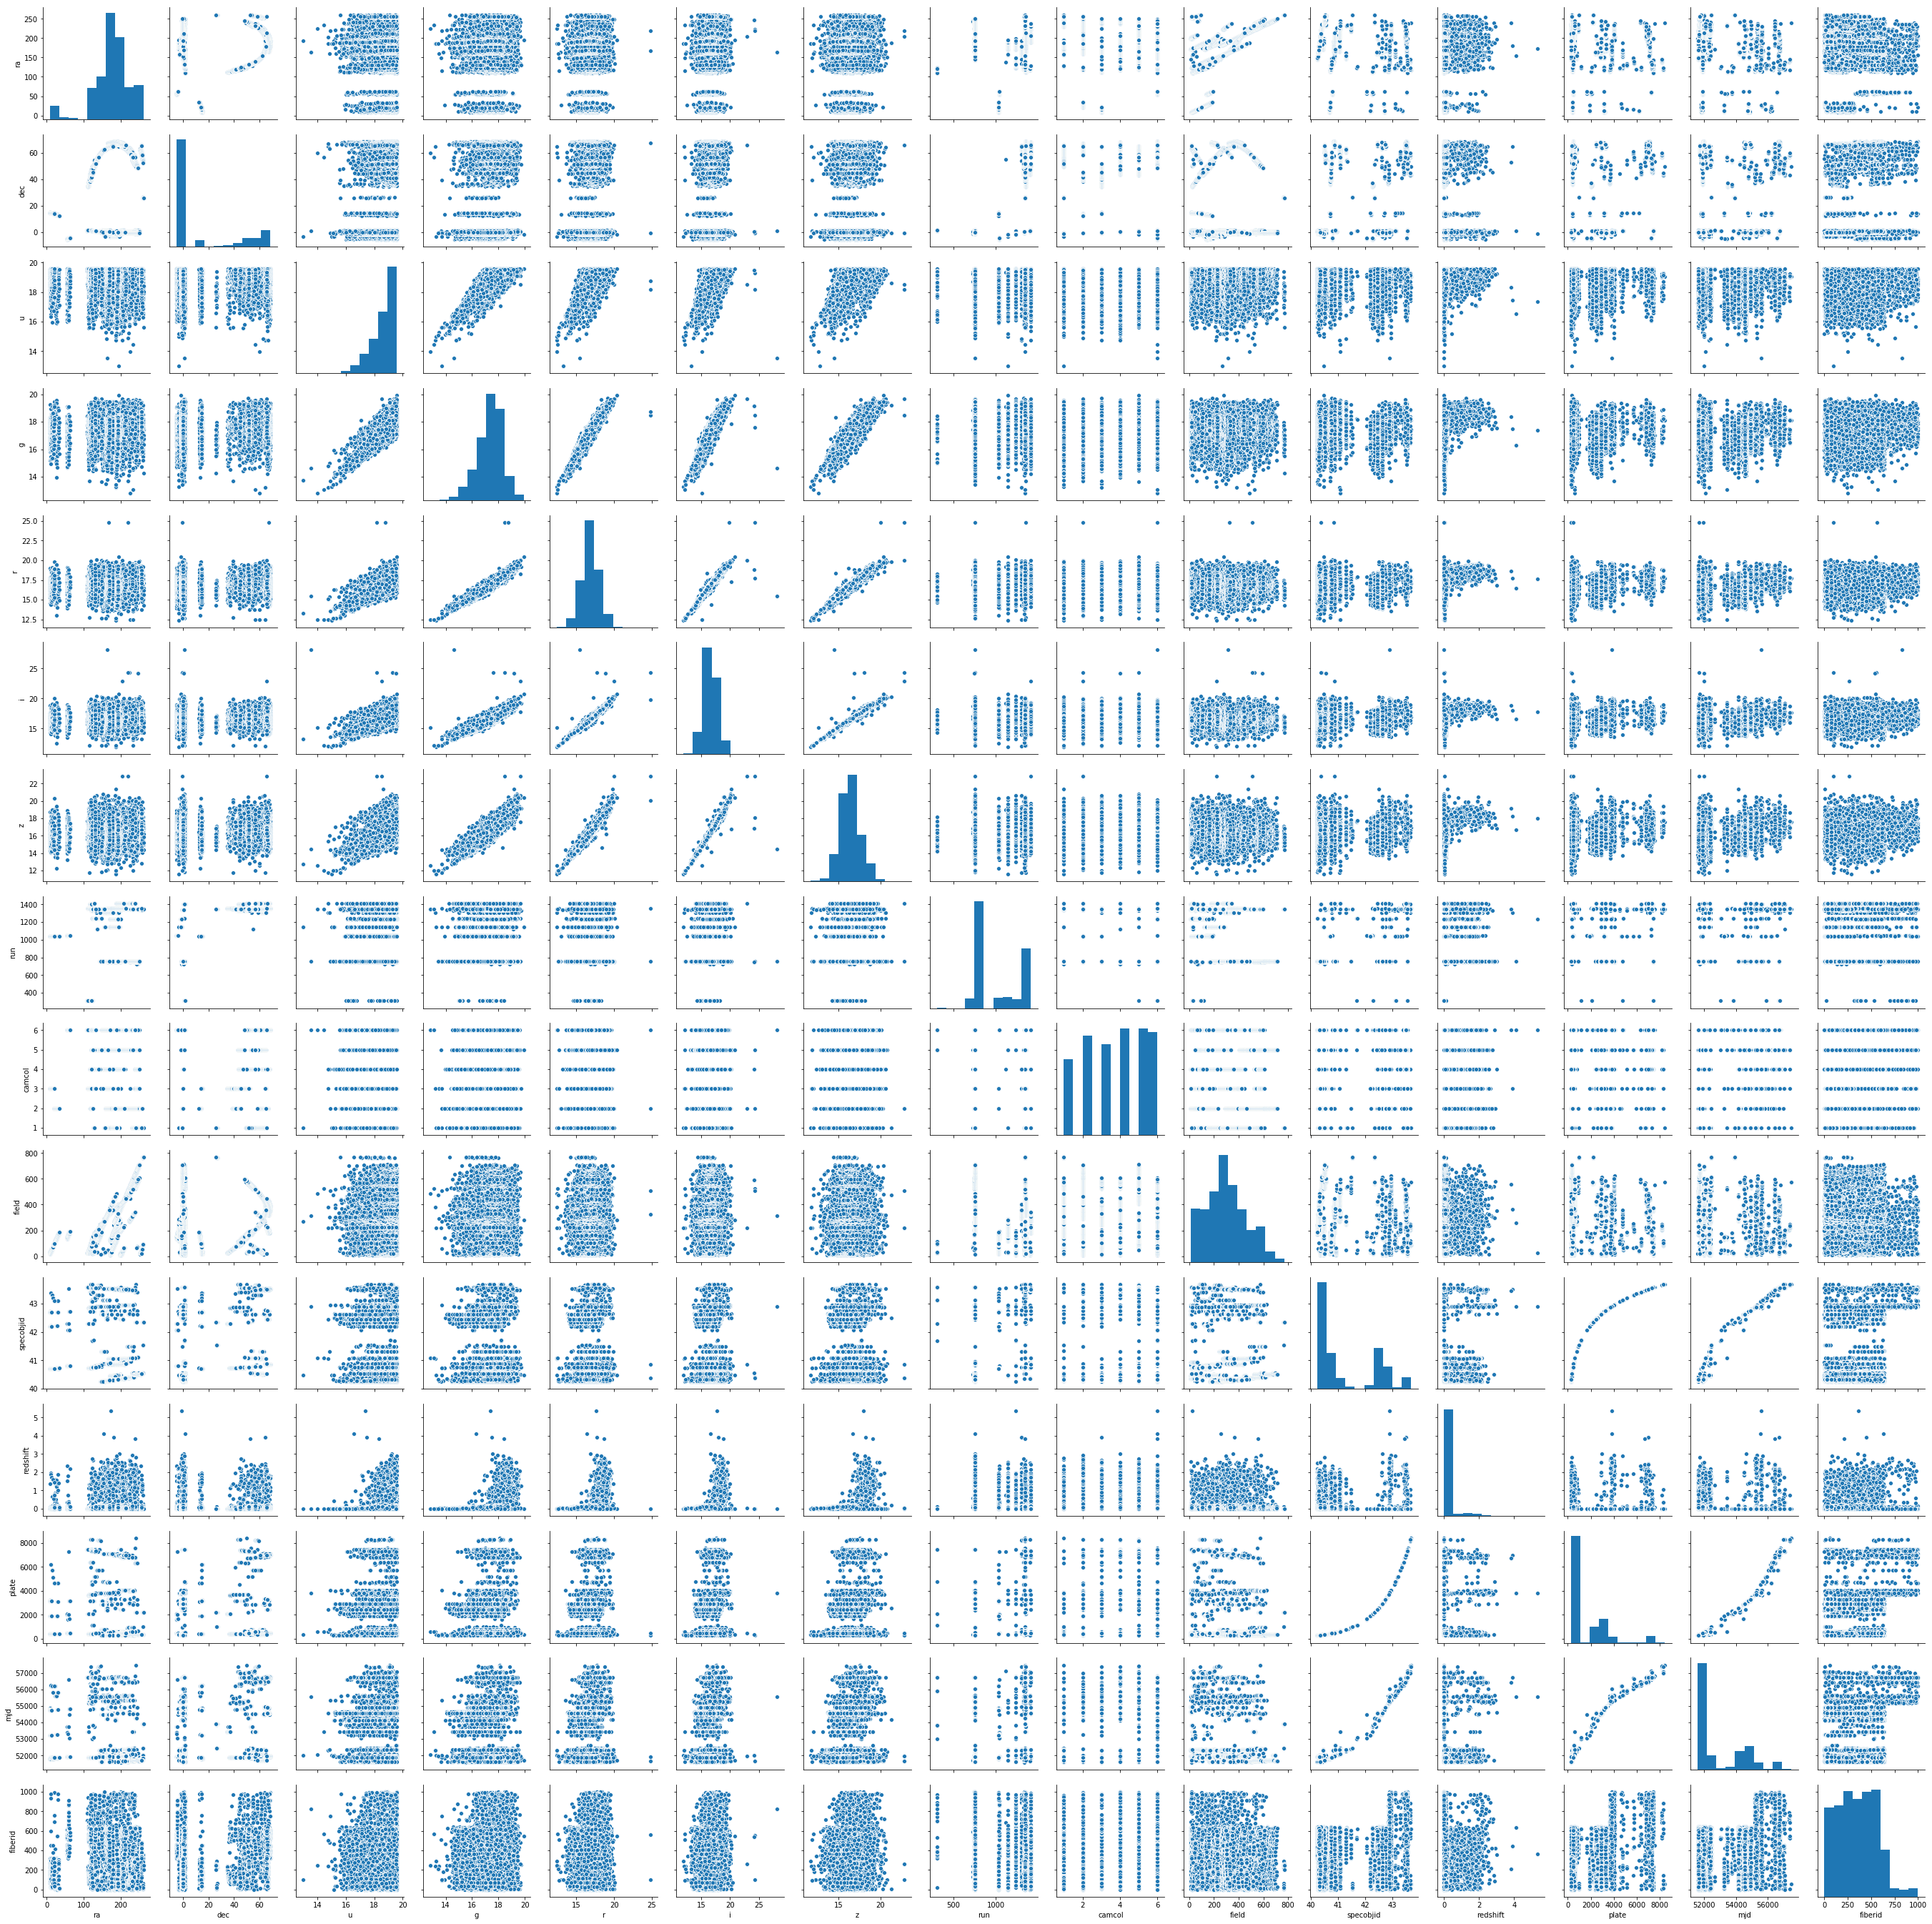

In [134]:
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

### Label Encoding

In [135]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [136]:
df['class']=le.fit_transform(df['class'])

In [137]:
df.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

### Define X and y

In [138]:
X=df.drop('class',axis=1)
X.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'specobjid', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [139]:
y=df['class']
y.head()

0    2
1    2
2    0
3    2
4    2
Name: class, dtype: int32

### Train Test split

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=102)

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score

In [142]:
#GridserachCV for Logistic regression
parameters={'C':[1,10],'random_state':range(50,110)}
lg=LogisticRegression()
clf=GridSearchCV(lg,parameters)
clf.fit(X,y)
print(clf.best_params_)

{'C': 1, 'random_state': 50}


In [143]:
#GridsearchCV for Decision Tree
parameters={'criterion':['gini','entropy'],'max_leaf_nodes':[5,50],'random_state':range(40,105)}
dtc=DecisionTreeClassifier()
clf=GridSearchCV(dtc,parameters)
clf.fit(X,y)
print(clf.best_params_)

{'criterion': 'entropy', 'max_leaf_nodes': 5, 'random_state': 40}


In [144]:
#GridsearchCV for KNN
parameters={'n_neighbors':range(3,6)}
knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(X,y)
print(clf.best_params_)

{'n_neighbors': 5}


In [145]:
#Fitting the model with best parameters
LR=LogisticRegression(C=1,random_state=50)
dtc=DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state= 40)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier()

In [146]:

models=[LR,dtc,knn,SVC(),rfc]
for m in models:
    m.fit(X_train,y_train)
    y_pred_train=m.predict(X_train)
    print("fitting",m,"model:\n")
    print("Accuracy of train data:\n",accuracy_score(y_train,y_pred_train))
    y_pred_test=m.predict(X_test)
    print("Accuracy of test data:\n",accuracy_score(y_test,y_pred_test))
    print("Confusion matrix of test data:\n",confusion_matrix(y_test,y_pred_test))
    print("Classification report of test data:\n",classification_report(y_test,y_pred_test))

fitting LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=50, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) model:

Accuracy of train data:
 0.9022857142857142
Accuracy of test data:
 0.8943333333333333
Confusion matrix of test data:
 [[1401    6   61]
 [  38  189   26]
 [ 169   17 1093]]
Classification report of test data:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1468
           1       0.89      0.75      0.81       253
           2       0.93      0.85      0.89      1279

   micro avg       0.89      0.89      0.89      3000
   macro avg       0.90      0.85      0.87      3000
weighted avg       0.90      0.89      0.89      3000

fitting DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes

From the above built models, we can conclude that Random Forest is giving the best accuracy for both train and test and also good predicion and recall values.

In [147]:
#Saving the model
from sklearn.externals import joblib

In [148]:
joblib.dump(rfc,'Space_server_rfc.pkl')

['Space_server_rfc.pkl']